<a href="https://colab.research.google.com/github/mikiiiiiiiiiiiiiiiiiiii/progetto_esame_AI/blob/main/progetto_classificazione_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn 
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [39]:
# load dei dati
# x il target: setosa = 0, versicolor = 2, virginica = 3
data= load_iris(return_X_y=True,as_frame=True)
target=pd.Series(data[1])
features=pd.DataFrame(data[0])
features.columns= features.columns.str.replace(' ','_')
full_data=features.join(target,how='right')
full_data

sepal_length_(cm)  sepal_width_(cm)  ...  petal_width_(cm)  target
0                  5.1               3.5  ...               0.2       0
1                  4.9               3.0  ...               0.2       0
2                  4.7               3.2  ...               0.2       0
3                  4.6               3.1  ...               0.2       0
4                  5.0               3.6  ...               0.2       0
..                 ...               ...  ...               ...     ...
145                6.7               3.0  ...               2.3       2
146                6.3               2.5  ...               1.9       2
147                6.5               3.0  ...               2.0       2
148                6.2               3.4  ...               2.3       2
149                5.9               3.0  ...               1.8       2

[150 rows x 5 columns]

**EXPLORATORY DATA ANALYSIS**

> Eslporiamo i nostri dati visualizzandoli



In [40]:
full_data.describe()

sepal_length_(cm)  sepal_width_(cm)  ...  petal_width_(cm)      target
count         150.000000        150.000000  ...        150.000000  150.000000
mean            5.843333          3.057333  ...          1.199333    1.000000
std             0.828066          0.435866  ...          0.762238    0.819232
min             4.300000          2.000000  ...          0.100000    0.000000
25%             5.100000          2.800000  ...          0.300000    0.000000
50%             5.800000          3.000000  ...          1.300000    1.000000
75%             6.400000          3.300000  ...          1.800000    2.000000
max             7.900000          4.400000  ...          2.500000    2.000000

[8 rows x 5 columns]

In [41]:
full_data.head()

sepal_length_(cm)  sepal_width_(cm)  ...  petal_width_(cm)  target
0                5.1               3.5  ...               0.2       0
1                4.9               3.0  ...               0.2       0
2                4.7               3.2  ...               0.2       0
3                4.6               3.1  ...               0.2       0
4                5.0               3.6  ...               0.2       0

[5 rows x 5 columns]

In [42]:
full_data.isnull().sum()

sepal_length_(cm)    0
sepal_width_(cm)     0
petal_length_(cm)    0
petal_width_(cm)     0
target               0
dtype: int64

In [43]:
full_data.groupby('target').size()

target
0    50
1    50
2    50
dtype: int64

In [44]:
train, validation = train_test_split(full_data, test_size = 0.3, random_state = 42)
validation, test = train_test_split(validation, test_size = 0.5, random_state = 42)
print('train shape:',train.shape,'\n validation shape',validation.shape,'\n test shape',test.shape)

train shape: (105, 5) 
 validation shape (22, 5) 
 test shape (23, 5)


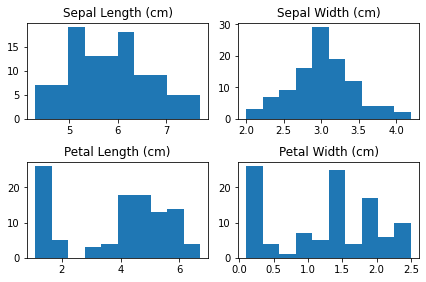

In [45]:
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(train['sepal_length_(cm)'], bins = n_bins);
axs[0,0].set_title('Sepal Length (cm)');
axs[0,1].hist(train['sepal_width_(cm)'], bins = n_bins);
axs[0,1].set_title('Sepal Width (cm)');
axs[1,0].hist(train['petal_length_(cm)'], bins = n_bins);
axs[1,0].set_title('Petal Length (cm)');
axs[1,1].hist(train['petal_width_(cm)'], bins = n_bins);
axs[1,1].set_title('Petal Width (cm)');

#spazio tra i plot
fig.tight_layout(pad=1.0);


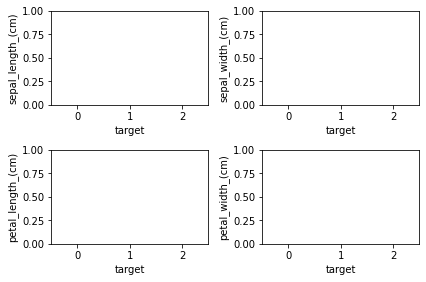

In [46]:
fig, axs = plt.subplots(2, 2)
fn = ["sepal_length(cm)", "sepal_width(cm)", "petal_length(cm)", "petal_width(cm)"]
cn = ['0', '1', '2']
sns.boxplot(x = 'target', y = 'sepal_length_(cm)', data = train, order = cn, ax = axs[0,0]);
sns.boxplot(x = 'target', y = 'sepal_width_(cm)', data = train, order = cn, ax = axs[0,1]);
sns.boxplot(x = 'target', y = 'petal_length_(cm)', data = train, order = cn, ax = axs[1,0]);
sns.boxplot(x = 'target', y = 'petal_width_(cm)', data = train,  order = cn, ax = axs[1,1]);
#spazio tra i plot
fig.tight_layout(pad=1.0);

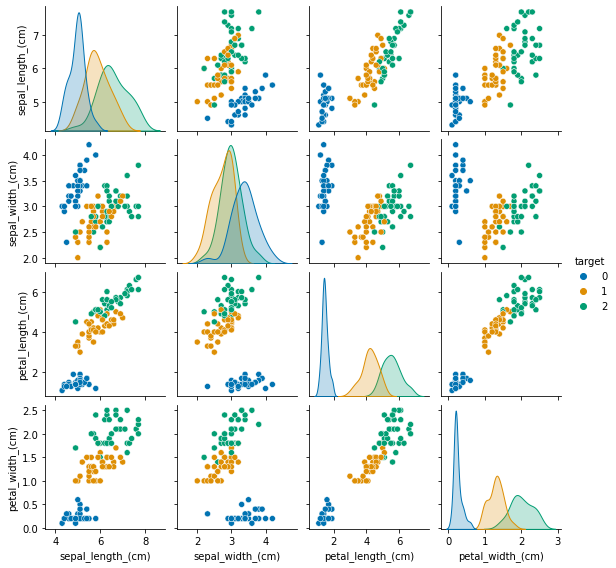

In [47]:
sns.pairplot(train, hue="target", height = 2, palette = 'colorblind')

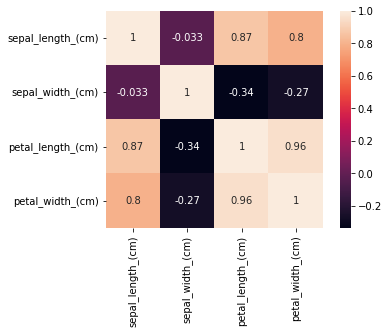

In [48]:
corrmat = train.iloc[:,0:4].corr()
sns.heatmap(corrmat, annot = True, square = True)

In [49]:
#PCA
pca=PCA(n_components=2)
pca.fit(train.iloc[:,:4])
expl_var=pca.explained_variance_ratio_
print(pca.components_,'\n',expl_var)


[[ 0.37167593 -0.06299273  0.85531578  0.35542065]
 [ 0.66585782  0.71303104 -0.19438974 -0.10214078]] 
 [0.9191876  0.05549301]


Cerchiamo il miglior classificatore 

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [51]:
# scaler=StandardScaler()
# scaler.transform(validation)
# scaler.transform(test)
X_train = train.loc[:,['sepal_length_(cm)','sepal_width_(cm)','petal_length_(cm)','petal_width_(cm)']]
Y_train = train['target']
X_validation = validation.loc[:,['sepal_length_(cm)','sepal_width_(cm)','petal_length_(cm)','petal_width_(cm)']]
Y_validation = validation['target']
X_test = test.loc[:,['sepal_length_(cm)','sepal_width_(cm)','petal_length_(cm)','petal_width_(cm)']]
Y_test = test['target']
train.head()

sepal_length_(cm)  sepal_width_(cm)  ...  petal_width_(cm)  target
81                 5.5               2.4  ...               1.0       1
133                6.3               2.8  ...               1.5       2
137                6.4               3.1  ...               1.8       2
75                 6.6               3.0  ...               1.4       1
109                7.2               3.6  ...               2.5       2

[5 rows x 5 columns]

In [52]:
# naive bayes
nv_classifier= GaussianNB()
nv_classifier.fit(X_train, Y_train)
sc_val_nb=nv_classifier.score(X_validation,Y_validation)
sc_test_nb=nv_classifier.score(X_test,Y_test)
print('validation score:',sc_val_nb,'\ntest score:',sc_test_nb)

validation score: 1.0 
test score: 0.9565217391304348


In [53]:
#KNN
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)
sc_val_knn=neigh.score(X_validation,Y_validation)
sc_test_knn=neigh.score(X_test,Y_test)
print('validation score:',sc_val_knn,'\ntest score:',sc_test_knn)

validation score: 1.0 
test score: 1.0


In [54]:

#SVM
svc = SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svm_class = GridSearchCV(svc , parameters)
svm_class.fit(X_train , Y_train)

validation score: 1.0 
test score: 1.0


In [55]:
#linear  SVM
svm_class_linear = LinearSVC()
svm_class_linear.fit(X_train, Y_train)
sc_val_svm_linear=svm_class_linear.score(X_validation,Y_validation)
sc_test_svm_linear=svm_class_linear.score(X_test,Y_test)
print('validation score:',sc_val_svm_linear,'\ntest score:',sc_test_svm_linear)

validation score: 1.0 
test score: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [56]:
#logistic regression
log_reg = LogisticRegression(verbose=1)
log_reg.fit(X_train, Y_train)
sc_val_log=log_reg.score(X_validation,Y_validation)
sc_test_log=log_reg.score(X_test,Y_test)
print('validation score:',sc_val_log,'\ntest score:',sc_test_log)

validation score: 1.0 
test score: 1.0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [57]:
coef=log_reg.coef_
bias=log_reg.intercept_
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 1,
 'warm_start': False}

In [58]:
prob=log_reg.predict_proba(X_test)
prob
# plt.plot()

array([[9.83082522e-01, 1.69174008e-02, 7.74941765e-08],
       [1.09786602e-04, 1.05539391e-01, 8.94350822e-01],
       [1.25332784e-05, 6.98550124e-02, 9.30132454e-01],
       [9.81770347e-01, 1.82295602e-02, 9.29077385e-08],
       [3.77203298e-04, 2.85378469e-01, 7.14244327e-01],
       [1.18313655e-02, 7.36985314e-01, 2.51183320e-01],
       [1.59550188e-03, 7.51298176e-01, 2.47106322e-01],
       [9.69205465e-01, 3.07944380e-02, 9.66017154e-08],
       [2.42371597e-03, 7.80609245e-01, 2.16967039e-01],
       [6.82524016e-03, 7.73233783e-01, 2.19940977e-01],
       [7.78046828e-02, 9.04139621e-01, 1.80556957e-02],
       [1.76101148e-06, 2.03704188e-02, 9.79627820e-01],
       [6.91013781e-03, 8.90023768e-01, 1.03066094e-01],
       [1.93823536e-05, 4.14600447e-02, 9.58520573e-01],
       [2.76992751e-02, 9.45150797e-01, 2.71499275e-02],
       [9.56059292e-01, 4.39404421e-02, 2.65388636e-07],
       [3.04429829e-03, 7.51701817e-01, 2.45253884e-01],
       [4.76686485e-03, 6.63333

In [ ]:
#kmeans
I_s=[]
inertia_train=[]
inertia_test=[]
for i in range(2):
  I_s.append(i)
  kmeans_train=KMeans(n_clusters=i,init='random',algorithm='full')
  kmeans_train.fit(X_train)
  kmeans_test=KMeans(n_clusters=i,init='random',algorithm='full')
  kmeans_test.fit(X_validation)
  inertia_train.append(kmeans_train.inertia_)
  inertia_test.append(kmeans_test.inertia_)
#plot the score relative to the given clusters
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('SCORES')
ax1.plot(I_s, inertia_train)
ax1.set_title('train')
ax2.plot(I_s, inertia_test)
ax2.set_title('test')

Text(0.5, 1.0, 'test')

In [60]:
#decision tree
DecTree = DecisionTreeClassifier()
DecTree.fit(X_train, Y_train)
sc_val_DecTree=DecTree.score(X_validation,Y_validation)
sc_test_DecTree=DecTree.score(X_test,Y_test)
print('validation score:',sc_val_DecTree,'\ntest score:',sc_test_DecTree)

validation score: 1.0 
test score: 1.0


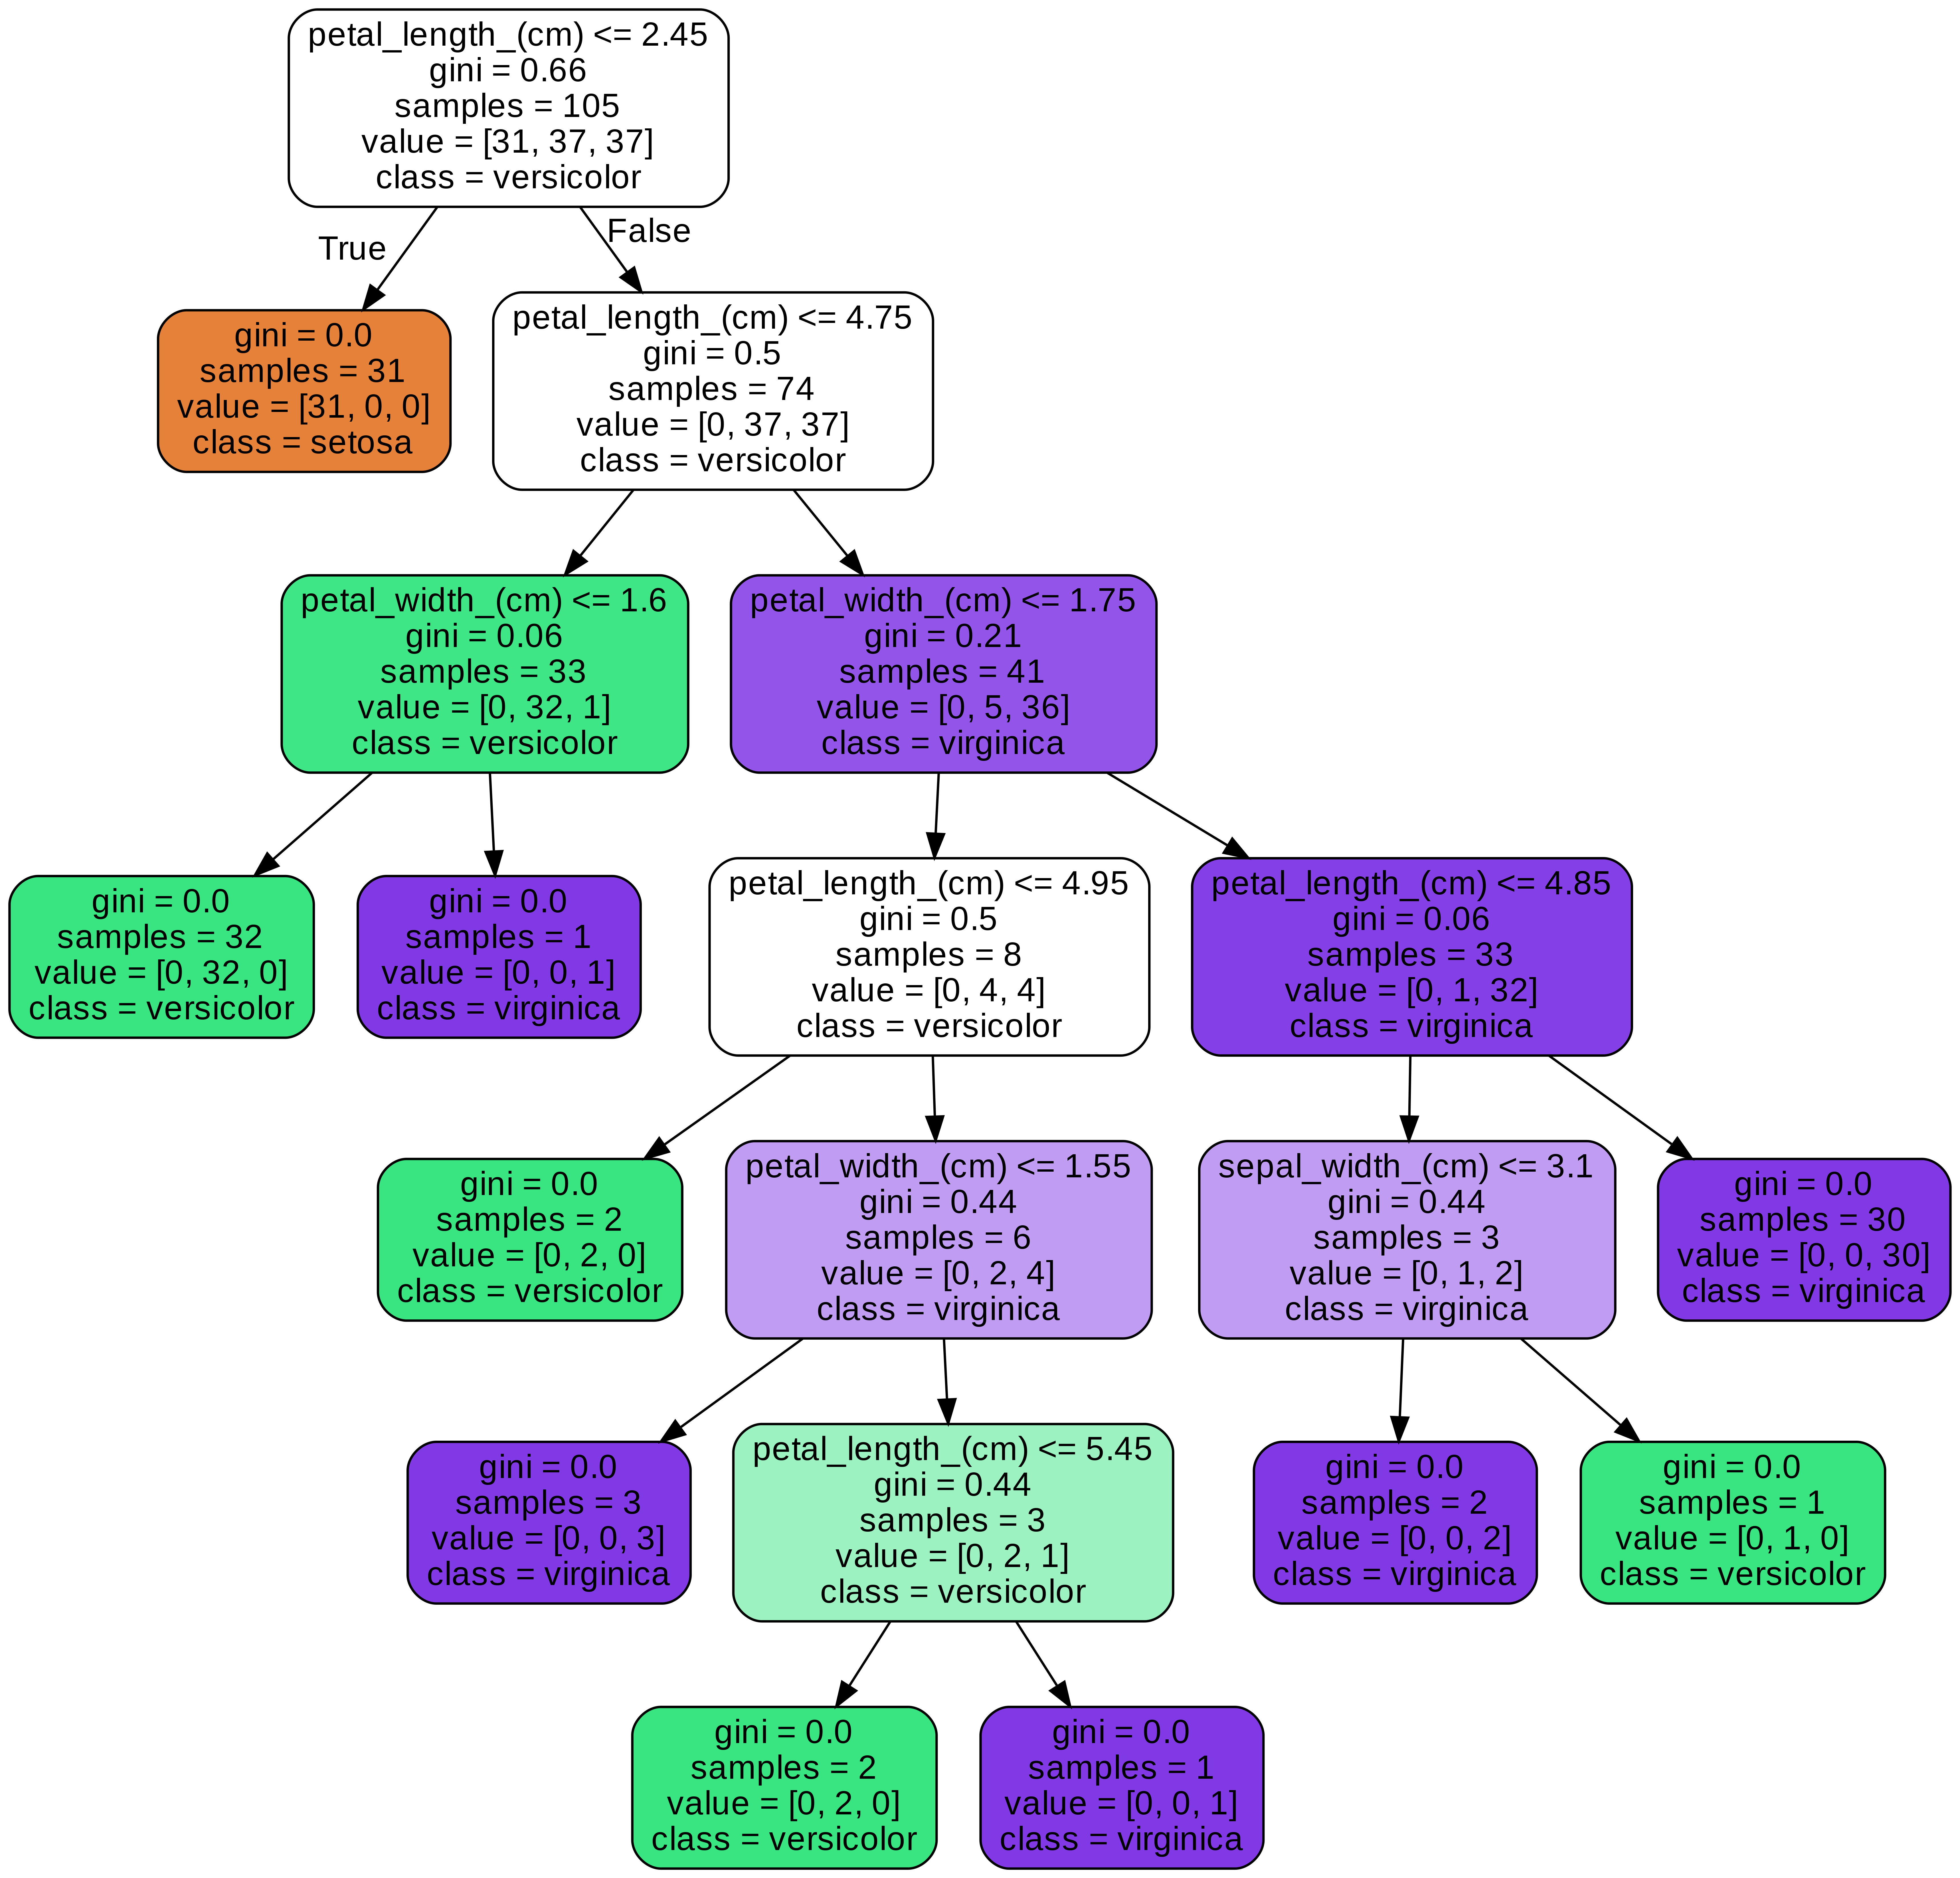

In [61]:
# visualize the decision tree
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(DecTree,
                out_file='DecTree.dot', 
                feature_names = X_train.columns,
                class_names=['setosa','versicolor','virginica'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'DecTree.dot', '-o', 'DecTree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'DecTree.png')

In [62]:
#random forest
random_forest = RandomForestClassifier(n_estimators=50)
random_forest.fit(X_train, Y_train)
sc_val_ranfor = random_forest.score(X_validation, Y_validation)
sc_test_ranfor = random_forest.score(X_test, Y_test)
print('validation score:' , sc_val_ranfor , '\ntest score:' , sc_test_ranfor)

validation score: 1.0 
test score: 1.0


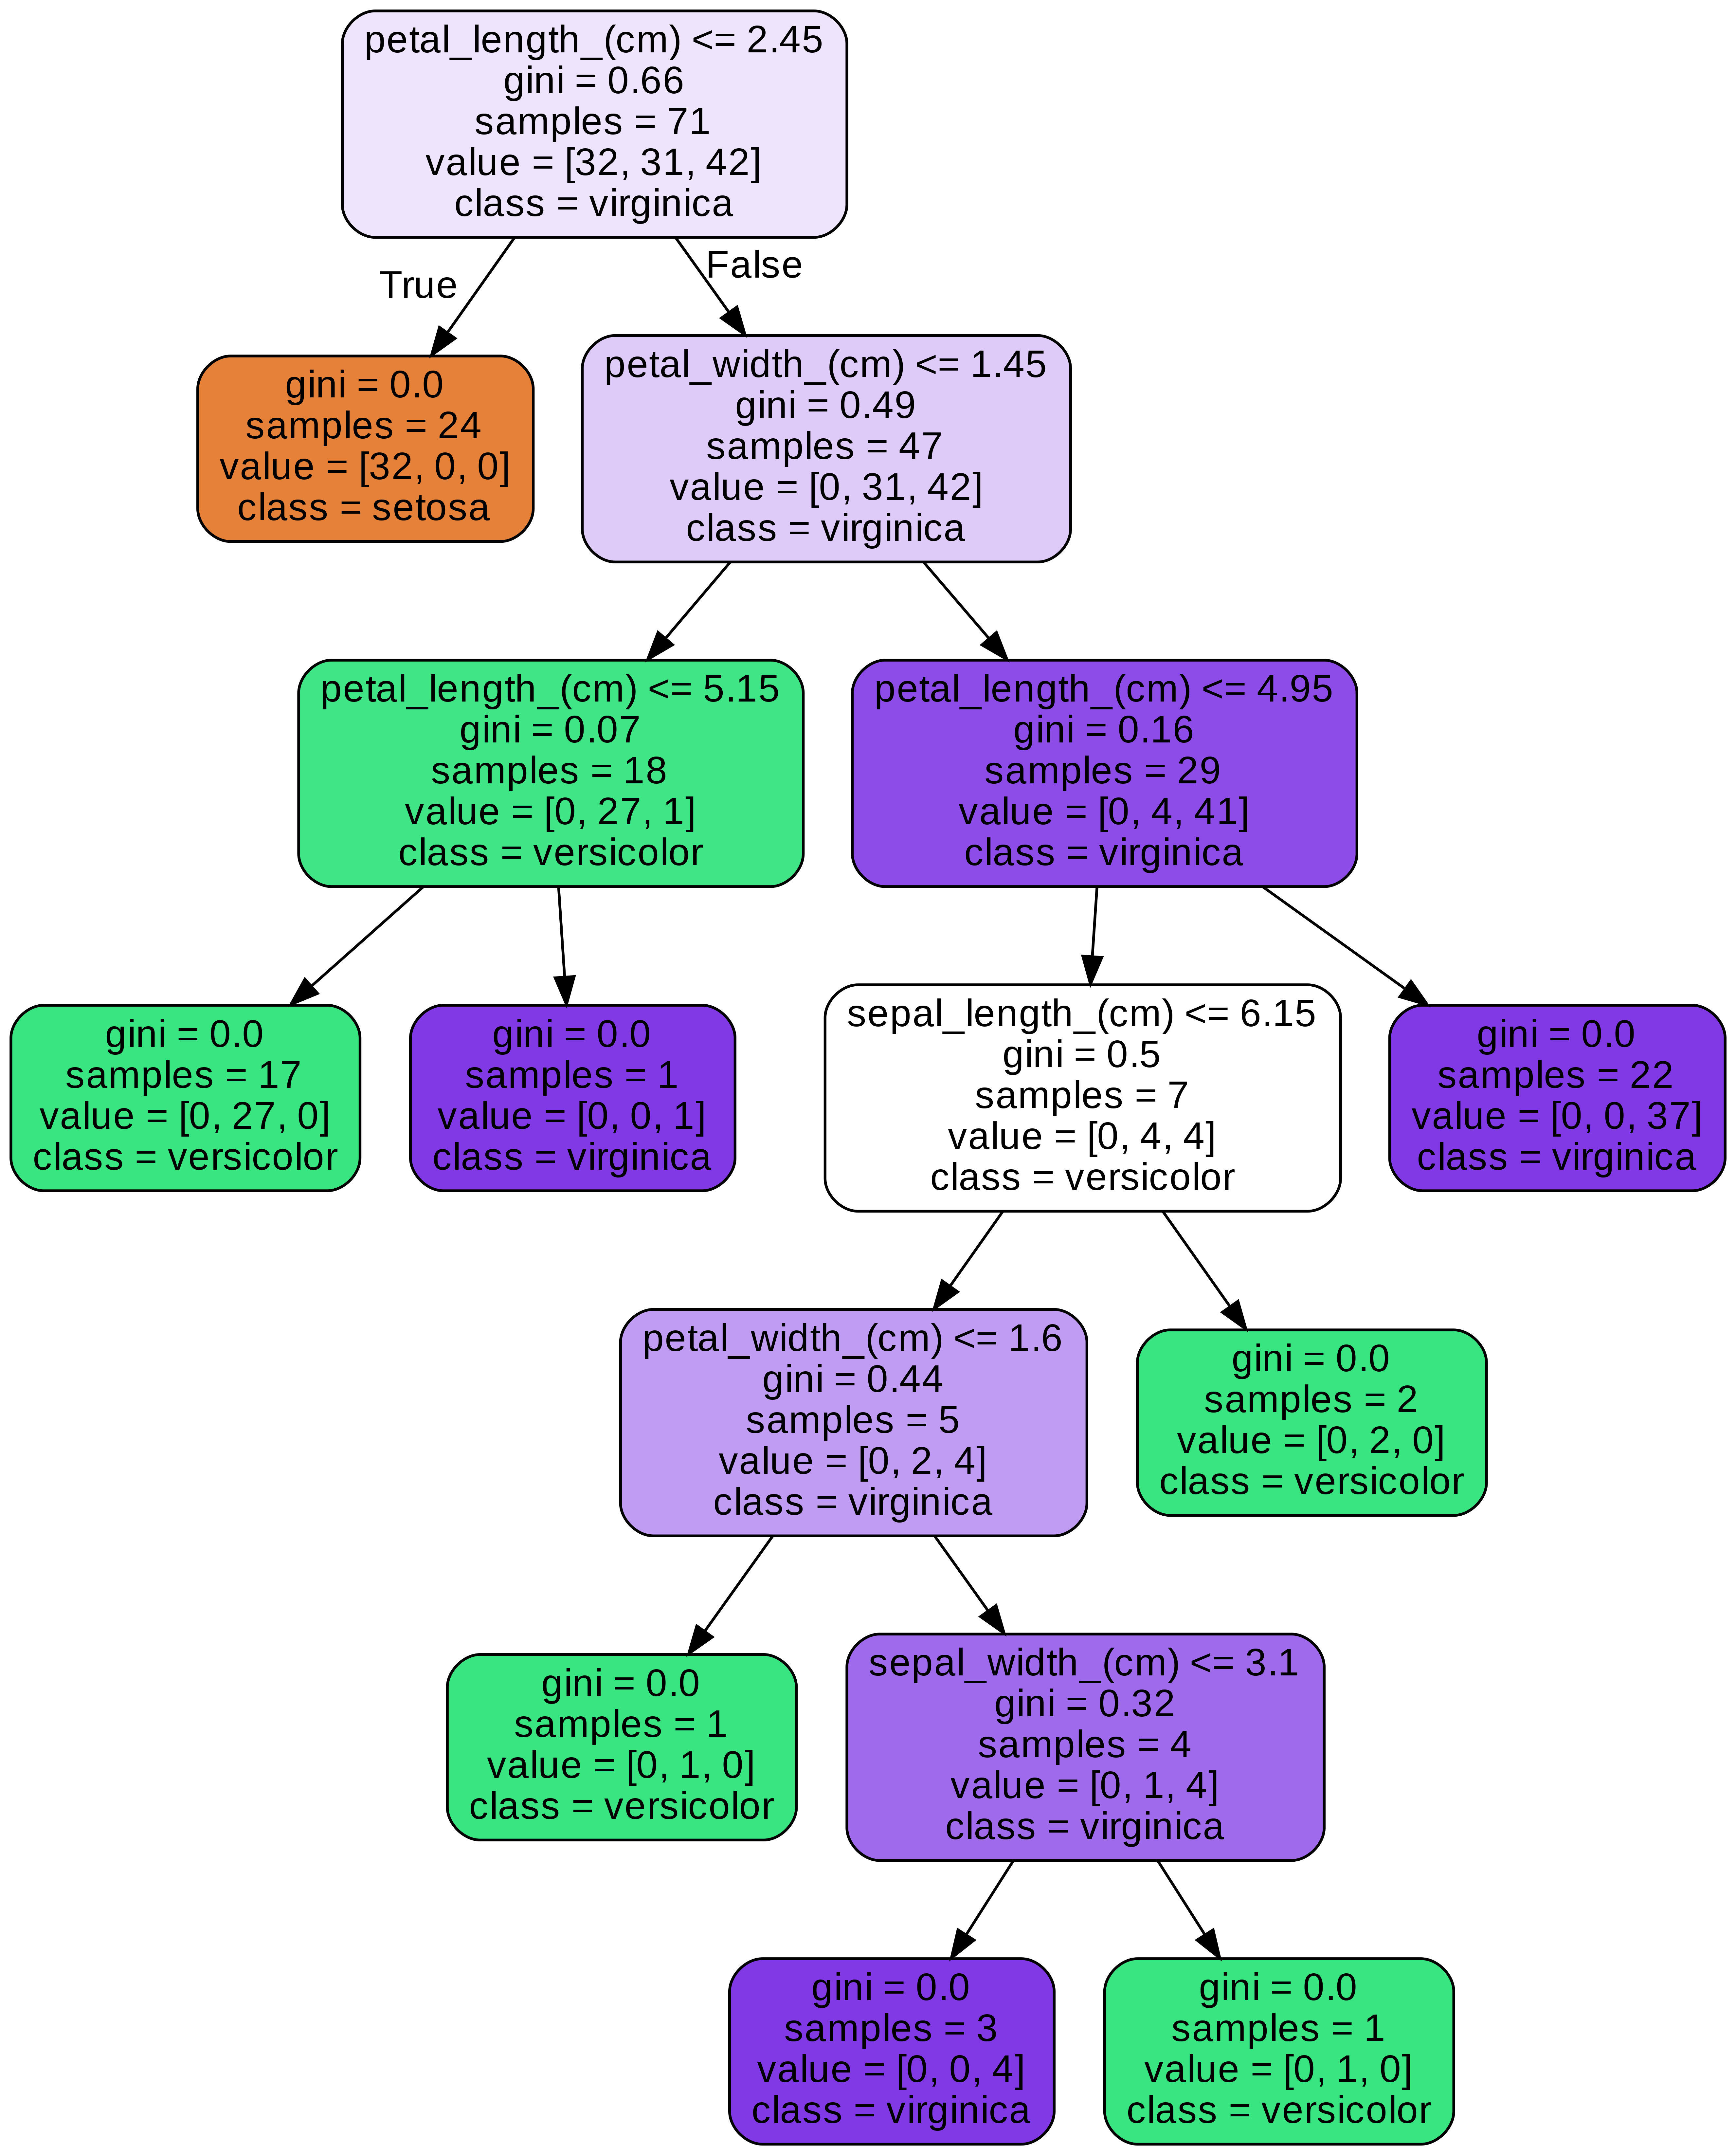

In [63]:
# visualize one tree of the forest
estimator = random_forest.estimators_[0]

# Export as dot file
export_graphviz(estimator, 
                out_file = 'first_tree.dot', 
                feature_names = X_train.columns,
                class_names = ['setosa','versicolor','virginica'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'first_tree.dot', '-o', 'first_tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'first_tree.png')

In [64]:
#Artificial Neural Network
model = keras.Sequential([
                    layers.Dense(units = 16 , input_dim = 4 , activation = 'relu'),
                    layers.Dense(units=32, activation = 'relu'),
                    layers.Dense(units=3, activation = 'softmax')
                    ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                80        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 723
Trainable params: 723
Non-trainable params: 0
_________________________________________________________________


In [65]:
keras.utils.to_categorical(Y_train)


array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1

In [66]:
model.compile( optimizer = 'adam' , loss = 'MeanSquaredError', metrics = ['accuracy'])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 100,restore_best_weights = True)
classifier_ANN_Model = model.fit(X_train , keras.utils.to_categorical(Y_train) , batch_size = 5 , epochs = 100, verbose = 1 ,
                               validation_data = (X_validation , keras.utils.to_categorical(Y_validation)) , callbacks = [early_stopping_cb])

Epoch 1/100
21/21 [==============================] - 1s 13ms/step - loss: 0.2234 - accuracy: 0.5714 - val_loss: 0.1752 - val_accuracy: 0.7273
Epoch 2/100
21/21 [==============================] - 0s 5ms/step - loss: 0.1898 - accuracy: 0.6381 - val_loss: 0.1259 - val_accuracy: 0.7273
Epoch 3/100
21/21 [==============================] - 0s 5ms/step - loss: 0.1591 - accuracy: 0.6095 - val_loss: 0.0981 - val_accuracy: 0.8636
Epoch 4/100
21/21 [==============================] - 0s 5ms/step - loss: 0.1439 - accuracy: 0.6476 - val_loss: 0.0837 - val_accuracy: 0.8636
Epoch 5/100
21/21 [==============================] - 0s 5ms/step - loss: 0.1337 - accuracy: 0.6476 - val_loss: 0.0778 - val_accuracy: 0.8636
Epoch 6/100
21/21 [==============================] - 0s 5ms/step - loss: 0.1265 - accuracy: 0.6476 - val_loss: 0.0720 - val_accuracy: 0.8636
Epoch 7/100
21/21 [==============================] - 0s 5ms/step - loss: 0.1196 - accuracy: 0.6476 - val_loss: 0.0672 - val_accuracy: 0.8636
Epoch 8/100


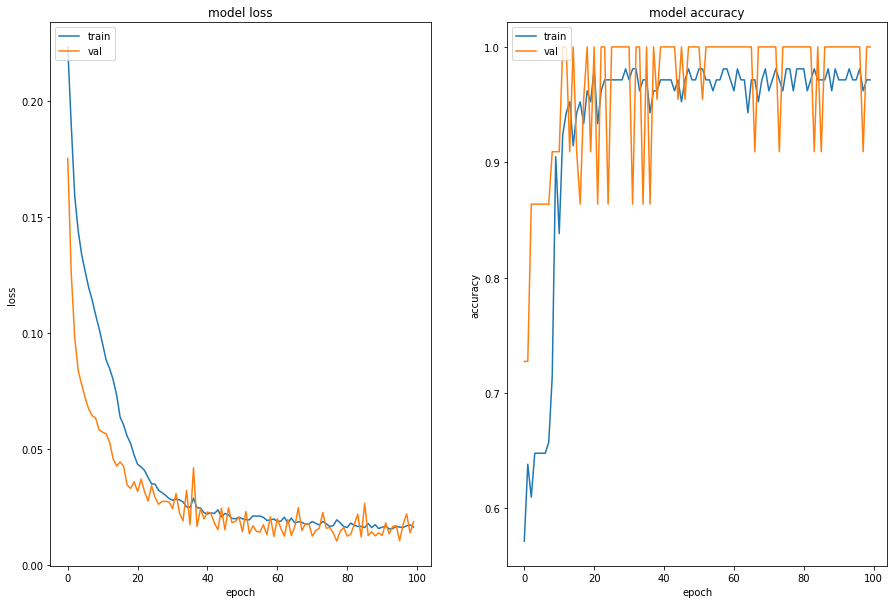

In [87]:
# test_loss, test_accuracy = model.evaluate(X_test,Y_test,verbose=0)

# print('Test Loss(MSE):', test_loss,'\nTest accuracy:',test_accuracy)
df = pd.DataFrame(classifier_ANN_Model.history)
fig , axes = plt.subplots(1,2)
# first plot
axes[0].plot(df.index , df['loss'] , df['val_loss'])
axes[0].set_title('model loss')
axes[0].set(xlabel = 'epoch' , ylabel = 'loss')
axes[0].legend(['train', 'val'] , loc = 'upper left')
#second plot
axes[1].plot(df.index , df['accuracy'] , df['val_accuracy'])
axes[1].set_title('model accuracy')
axes[1].set(xlabel = 'epoch' , ylabel = 'accuracy')
axes[1].legend(['train', 'val'] , loc = 'upper left')
fig.set_figheight(10)
fig.set_figwidth(15)